In [37]:
# Import libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load Random Forest Model
with open('Models/rf_model.pickle', 'rb') as file:
    rf_model = pickle.load(file)

In [4]:
# Load Naive Bayes Model
with open('Models/nb_model.pickle', 'rb') as file:
    nb_model = pickle.load(file)

In [5]:
# Loading data
df = pd.read_csv('Dataset/cleaned_adult.csv')

In [6]:
X = df.drop(['income'], axis=1) # Features
y = df['income'] # Label

In [7]:
# Apply Standard Scaler for the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [8]:
# Split the dataset
# 80% - Train & 20% - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision:{precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Random Forest Model:
Accuracy: 0.87
Precision:0.86
Recall: 0.87
F1 Score: 0.86


In [10]:
# Evaluate Naive Bayes Model
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision:{precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")

Naive Bayes Model:
Accuracy: 0.81
Precision:0.80
Recall: 0.81
F1 Score: 0.80


In [11]:
print("\nModel Comparison:")
print(f"Accuracy Difference: {accuracy_rf - accuracy_nb:.2f}")
print(f"Precision Difference: {precision_rf - precision_nb:.2f}")
print(f"Recall Difference: {recall_rf - recall_nb:.2f}")
print(f"F1 Score Difference: {f1_rf - f1_nb:.2f}")


Model Comparison:
Accuracy Difference: 0.05
Precision Difference: 0.06
Recall Difference: 0.05
F1 Score Difference: 0.06


In [42]:
# Accuracies of Both Models
results=pd.DataFrame({'Model':['Random Forest','Naive Bayes'],
                    'Accuracy Score':[accuracy_rf,accuracy_nb]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
Random Forest,0.865412
Naive Bayes,0.812839


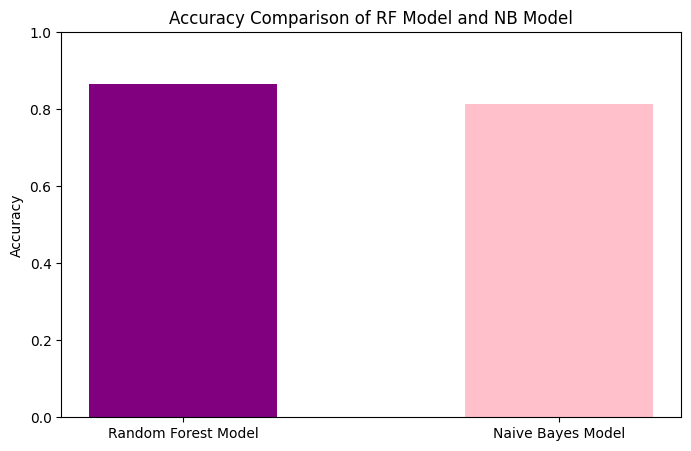

In [35]:
# Plotting the accuracies
models = ['Random Forest Model', 'Naive Bayes Model']
accuracies = [accuracy_rf, accuracy_nb]
bar_width = 0.5

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, bar_width, color=['purple', 'pink'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of RF Model and NB Model')
plt.ylim(0, 1)
plt.show()

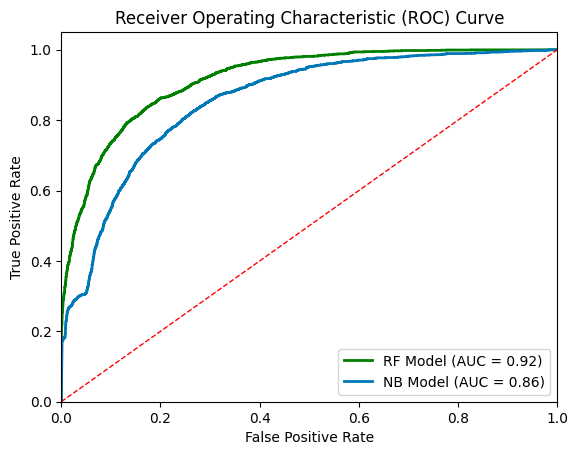

In [39]:
# Predict probabilities for Random Forest Model
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Predict probabilities for Naive Bayes Model
y_pred_prob_nb = nb_model.predict_proba(X_test)

# Calculate ROC curve and AUC for Random Forest Model
fpr_a, tpr_a, _ = roc_curve(y_test, y_pred_prob_rf[:, 1])
roc_auc_a = auc(fpr_a, tpr_a)

# Calculate ROC curve and AUC for Naive Bayes Model
fpr_b, tpr_b, _ = roc_curve(y_test, y_pred_prob_nb[:, 1])
roc_auc_b = auc(fpr_b, tpr_b)

# Plot ROC curves
plt.figure()
plt.plot(fpr_a, tpr_a, color='green', lw=2, label='RF Model (AUC = %0.2f)' % roc_auc_a)
plt.plot(fpr_b, tpr_b, color='#0077b6', lw=2, label='NB Model (AUC = %0.2f)' % roc_auc_b)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()